In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
# Set constants
n_datasets = 100
n_train = 50
n_test = 1000
noise_std = 0.3
np.random.seed(42)

# True function
def f(x):
    return np.sin(2 * np.pi * x)

# Fixed test set
x_test = np.linspace(0, 1, n_test).reshape(-1, 1)
y_true = f(x_test).ravel()

# Store predictions for each model
preds_tree = []
preds_rf = []
preds_gb = []

# Generate datasets and train models
for _ in range(n_datasets):
    x_train = np.random.uniform(0, 1, size=(n_train, 1))
    y_train = f(x_train).ravel() + np.random.normal(0, noise_std, size=n_train)

    # Train models
    tree = DecisionTreeRegressor(max_depth=5)
    rf = RandomForestRegressor(n_estimators=100)
    gb = GradientBoostingRegressor(n_estimators=100)

    tree.fit(x_train, y_train)
    rf.fit(x_train, y_train)
    gb.fit(x_train, y_train)

    preds_tree.append(tree.predict(x_test))
    preds_rf.append(rf.predict(x_test))
    preds_gb.append(gb.predict(x_test))

# Convert to numpy arrays
preds_tree = np.array(preds_tree)
preds_rf = np.array(preds_rf)
preds_gb = np.array(preds_gb)

In [6]:
# Compute bias^2, variance, MSE
def compute_bias_variance_mse(preds, y_true):
    avg_pred = np.mean(preds, axis=0)
    bias_squared = np.mean((avg_pred - y_true) ** 2)
    variance = np.mean(np.var(preds, axis=0))
    mse = np.mean((preds - y_true) ** 2)
    return bias_squared, variance, mse

bias2_tree, var_tree, mse_tree = compute_bias_variance_mse(preds_tree, y_true)
bias2_rf, var_rf, mse_rf = compute_bias_variance_mse(preds_rf, y_true)
bias2_gb, var_gb, mse_gb = compute_bias_variance_mse(preds_gb, y_true)

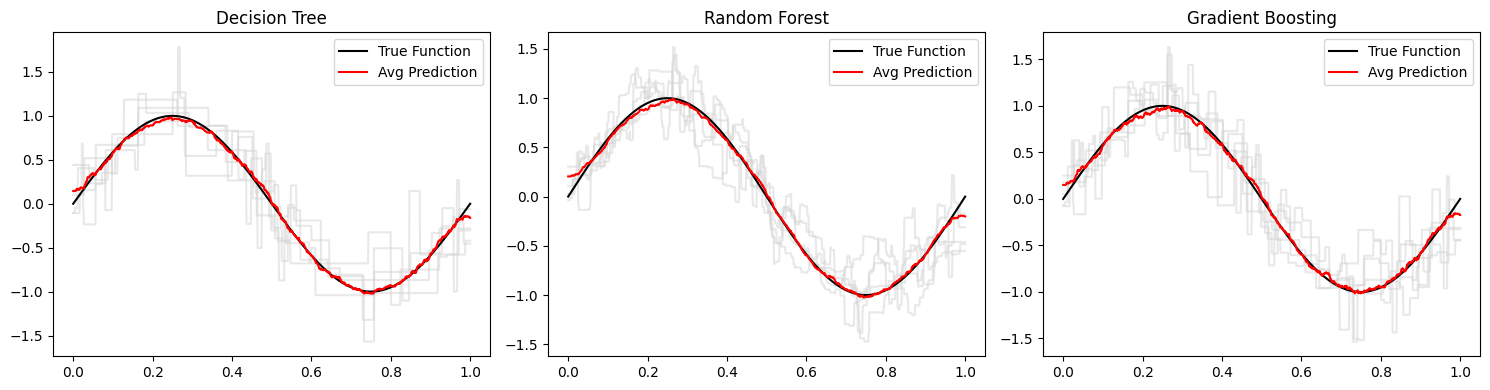

In [7]:
# Plot representative predictions
plt.figure(figsize=(15, 4))

for i, (model_preds, title) in enumerate(zip(
    [preds_tree, preds_rf, preds_gb],
    ["Decision Tree", "Random Forest", "Gradient Boosting"]
)):
    plt.subplot(1, 3, i+1)
    for j in range(5):  # plot 5 example model predictions
        plt.plot(x_test, model_preds[j], color='lightgray', alpha=0.5)
    plt.plot(x_test, f(x_test), label='True Function', color='black')
    plt.plot(x_test, np.mean(model_preds, axis=0), label='Avg Prediction', color='red')
    plt.title(title)
    plt.legend()

plt.tight_layout()
plt.show()

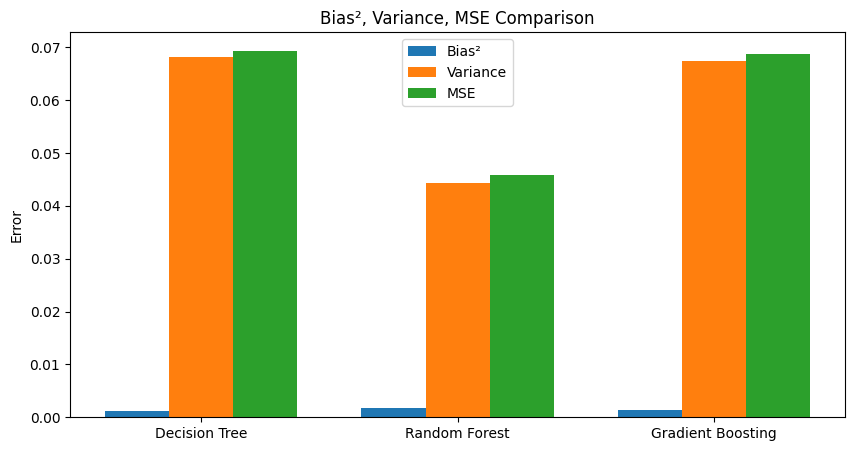

In [8]:
#Bar plot of bias², variance, MSE
labels = ["Decision Tree", "Random Forest", "Gradient Boosting"]
bias2_vals = [bias2_tree, bias2_rf, bias2_gb]
var_vals = [var_tree, var_rf, var_gb]
mse_vals = [mse_tree, mse_rf, mse_gb]

x = np.arange(len(labels))
width = 0.25

plt.figure(figsize=(10, 5))
plt.bar(x - width, bias2_vals, width, label='Bias²')
plt.bar(x, var_vals, width, label='Variance')
plt.bar(x + width, mse_vals, width, label='MSE')
plt.xticks(x, labels)
plt.ylabel("Error")
plt.title("Bias², Variance, MSE Comparison")
plt.legend()
plt.show()